In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from scipy.stats import scoreatpercentile
import math

# jobs_dataframe.csv
# job_tasks_dataframe.csv
# flat_dataframe.csv

In [2]:
df = pd.read_csv('flat_dataframe.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65065c6a90>,
      dtype=object)

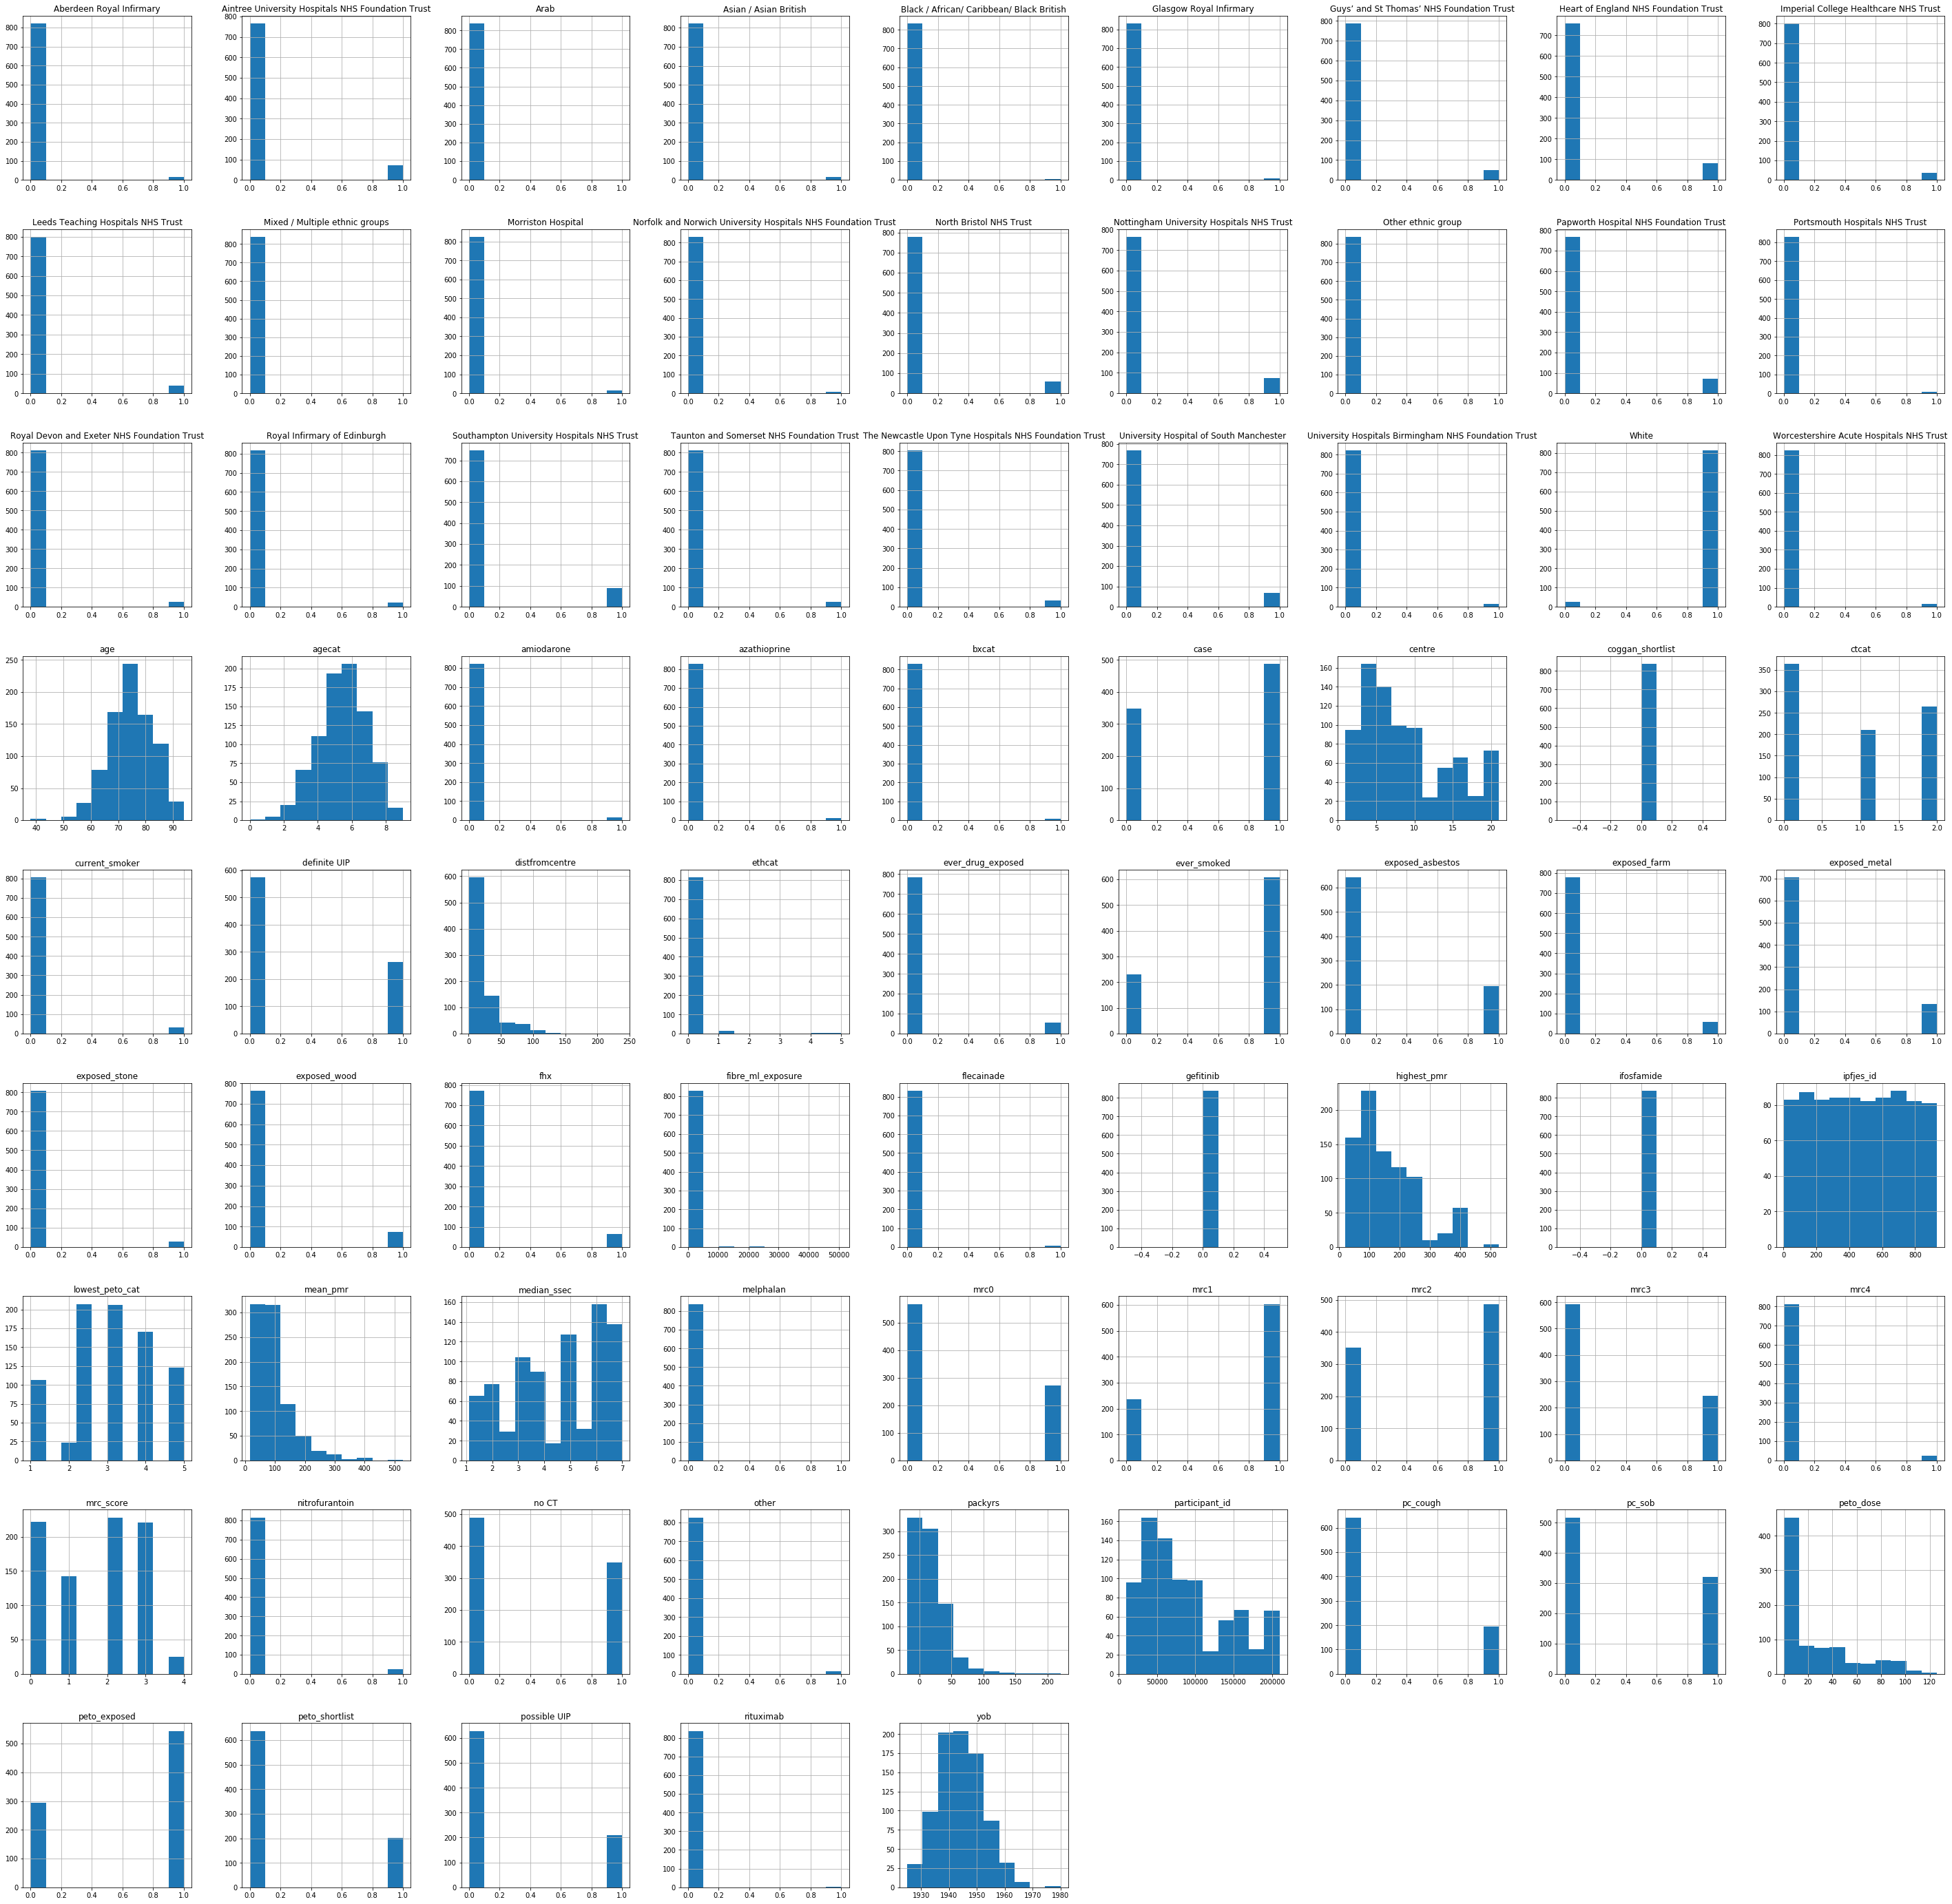

In [3]:
# histograms
df.hist(figsize=(50,50))

In [4]:
# correlation coefficients
df.corr()

,ipfjes_id,case,age,ever_smoked,current_smoker,packyrs,participant_id,centre,distfromcentre,fhx,...,Black / African/ Caribbean/ Black British,Mixed / Multiple ethnic groups,Other ethnic group,White,definite UIP,no CT,other,possible UIP,yob,ever_drug_exposed
ipfjes_id,1.000000,-0.363708,-0.028339,-0.060934,0.025483,-0.074414,0.204915,0.204636,-0.033038,-0.138290,...,0.052386,-0.031855,0.014019,0.021702,-0.206755,0.364016,0.029578,-0.208774,0.029284,0.048649
case,-0.363708,1.000000,0.113397,0.076525,-0.109396,0.069727,0.122511,0.122678,0.251966,0.103573,...,-0.028778,0.029248,-0.057872,-0.014624,0.568806,-0.982795,0.047433,0.489417,-0.114073,-0.162586
age,-0.028339,0.113397,1.000000,-0.060491,-0.179335,-0.106700,-0.031251,-0.031257,-0.030172,-0.061624,...,0.005367,0.010101,-0.022059,0.016289,0.101772,-0.114137,-0.043456,0.034598,-0.998185,-0.071403
ever_smoked,-0.060934,0.076525,-0.060491,1.000000,0.122552,0.466438,0.064394,0.064425,-0.027640,-0.018718,...,0.012928,-0.056199,-0.024721,0.054718,0.054448,-0.077095,0.012291,0.034786,0.060267,-0.012841
current_smoker,0.025483,-0.109396,-0.179335,0.122552,1.000000,0.149322,-0.029891,-0.029895,-0.074868,0.034206,...,0.065415,-0.006887,-0.009746,-0.040451,-0.081513,0.109548,-0.025012,-0.029011,0.180259,-0.052293
packyrs,-0.074414,0.069727,-0.106700,0.466438,0.149322,1.000000,0.028681,0.028700,-0.029382,0.066860,...,-0.002749,-0.026213,-0.009341,0.034899,-0.023068,-0.074208,-0.001856,0.113849,0.107645,-0.054413
participant_id,0.204915,0.122511,-0.031251,0.064394,-0.029891,0.028681,1.000000,1.000000,-0.042218,-0.029300,...,0.045504,0.003326,-0.020998,-0.005262,0.070236,-0.129222,0.076401,0.040706,0.033345,-0.024076
centre,0.204636,0.122678,-0.031257,0.064425,-0.029895,0.028700,1.000000,1.000000,-0.042167,-0.029264,...,0.045486,0.003332,-0.021000,-0.005270,0.070334,-0.129390,0.076407,0.040790,0.033351,-0.024098
distfromcentre,-0.033038,0.251966,-0.030172,-0.027640,-0.074868,-0.029382,-0.042218,-0.042167,1.000000,0.064964,...,-0.043738,0.043970,-0.030169,-0.011764,0.147653,-0.234107,-0.019926,0.117780,0.029258,0.007987
fhx,-0.138290,0.103573,-0.061624,-0.018718,0.034206,0.066860,-0.029300,-0.029264,0.064964,1.000000,...,-0.022653,-0.010106,-0.014301,-0.029477,0.078275,-0.103228,-0.000856,0.035378,0.060959,-0.040651


,case,age,yob,distfromcentre,ever_smoked,packyrs,median_ssec,fhx,highest_pmr,mean_pmr,lowest_peto_cat,peto_dose,fibre_ml_exposure,exposed_stone,exposed_wood,exposed_metal,exposed_asbestos,exposed_farm,ever_drug_exposed
case,1,0.11,-0.11,0.25,0.077,0.07,0.041,0.1,0.052,0.019,-0.024,-0.015,0.025,0.072,0.033,0.069,-0.0073,0.044,-0.16
age,0.11,1,-1,-0.03,-0.06,-0.11,-0.1,-0.062,0.045,0.048,-0.042,0.02,0.0042,-0.016,-0.024,-0.044,-0.074,0.099,-0.071
yob,-0.11,-1,1,0.029,0.06,0.11,0.1,0.061,-0.045,-0.047,0.041,-0.02,-0.0016,0.021,0.026,0.046,0.075,-0.1,0.072
distfromcentre,0.25,-0.03,0.029,1,-0.028,-0.029,-0.063,0.065,-0.032,-0.05,0.07,-0.079,0.033,-0.025,-0.058,-0.088,-0.056,0.082,0.008
ever_smoked,0.077,-0.06,0.06,-0.028,1,0.47,0.18,-0.019,0.058,-0.0095,-0.13,0.079,0.048,0.047,0.022,0.048,0.11,0.012,-0.013
packyrs,0.07,-0.11,0.11,-0.029,0.47,1,0.17,0.067,0.00084,-0.054,-0.095,0.073,0.038,-0.0047,-0.012,0.033,0.051,0.04,-0.054
median_ssec,0.041,-0.1,0.1,-0.063,0.18,0.17,1,0.023,0.14,0.064,-0.38,0.26,0.037,0.083,0.095,0.2,0.14,0.16,-0.11
fhx,0.1,-0.062,0.061,0.065,-0.019,0.067,0.023,1,0.0063,-0.0063,-0.035,0.024,0.069,0.015,0.034,0.043,0.048,-0.029,-0.041
highest_pmr,0.052,0.045,-0.045,-0.032,0.058,0.00084,0.14,0.0063,1,0.81,-0.56,0.51,0.084,-0.0025,0.29,0.22,0.35,-0.03,0.018
mean_pmr,0.019,0.048,-0.047,-0.05,-0.0095,-0.054,0.064,-0.0063,0.81,1,-0.45,0.59,0.14,-0.012,0.29,0.13,0.32,-0.13,0.02


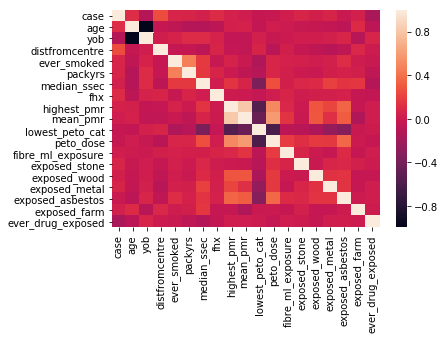

In [5]:
# correlation coefficients for select variables with visual aid
corr = df[['case', 'age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'median_ssec', 'fhx','highest_pmr', 'mean_pmr', 'lowest_peto_cat',
           'peto_dose', 'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm', 'ever_drug_exposed']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,age,yob,distfromcentre,ever_smoked,packyrs,median_ssec,definite UIP,highest_pmr,mean_pmr,lowest_peto_cat,peto_dose,fibre_ml_exposure,exposed_stone,exposed_wood,exposed_metal,exposed_asbestos,exposed_farm
age,1,-1,-0.022,-0.16,-0.21,-0.2,0.058,0.029,0.038,0.015,-0.011,0.017,-0.017,-0.034,-0.043,-0.09,0.084
yob,-1,1,0.021,0.16,0.21,0.21,-0.056,-0.028,-0.036,-0.016,0.0098,-0.015,0.022,0.035,0.046,0.091,-0.088
distfromcentre,-0.022,0.021,1,-0.01,-0.023,-0.035,0.01,-0.028,-0.044,0.046,-0.046,0.052,-0.06,-0.064,-0.11,-0.022,0.11
ever_smoked,-0.16,0.16,-0.01,1,0.44,0.22,0.026,0.034,-0.031,-0.16,0.078,0.047,0.037,0.025,0.0079,0.13,-0.0072
packyrs,-0.21,0.21,-0.023,0.44,1,0.12,-0.091,-0.017,-0.061,-0.068,0.042,0.039,-0.01,-0.0059,0.0073,0.046,-0.011
median_ssec,-0.2,0.21,-0.035,0.22,0.12,1,0.0054,0.13,0.057,-0.36,0.24,0.04,0.077,0.094,0.22,0.11,0.15
definite UIP,0.058,-0.056,0.01,0.026,-0.091,0.0054,1,0.055,0.046,0.0021,-0.024,0.054,0.07,0.023,-0.047,-0.019,0.045
highest_pmr,0.029,-0.028,-0.028,0.034,-0.017,0.13,0.055,1,0.8,-0.55,0.49,0.12,-0.04,0.28,0.2,0.32,-0.032
mean_pmr,0.038,-0.036,-0.044,-0.031,-0.061,0.057,0.046,0.8,1,-0.44,0.6,0.2,-0.031,0.24,0.11,0.28,-0.14
lowest_peto_cat,0.015,-0.016,0.046,-0.16,-0.068,-0.36,0.0021,-0.55,-0.44,1,-0.58,-0.073,-0.1,-0.13,-0.3,-0.26,-0.018


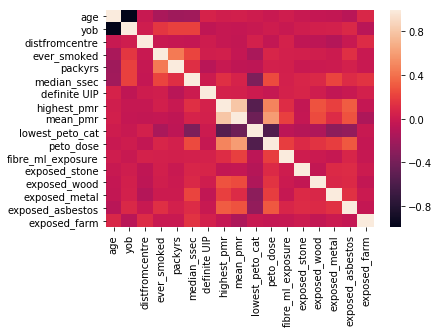

In [6]:
# correlation coefficients for select variables with visual aid for cases only
corr = df[df['case'] == 1][['age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'median_ssec', 'definite UIP', 'highest_pmr', 'mean_pmr', 'lowest_peto_cat', 'peto_dose', 
           'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,yob,distfromcentre,ever_smoked,packyrs,median_ssec,fhx,highest_pmr,mean_pmr,lowest_peto_cat,peto_dose,fibre_ml_exposure,exposed_stone,exposed_wood,exposed_metal,exposed_asbestos,exposed_farm
age,1,-1,-0.11,0.047,0.033,0.013,-0.044,0.054,0.057,-0.11,0.066,-0.035,-0.042,-0.022,-0.07,-0.056,0.11
yob,-1,1,0.12,-0.047,-0.032,-0.014,0.037,-0.056,-0.056,0.11,-0.065,0.038,0.047,0.023,0.07,0.057,-0.11
distfromcentre,-0.11,0.12,1,-0.12,-0.11,-0.15,0.013,-0.084,-0.081,0.14,-0.14,-0.045,-0.003,-0.076,-0.097,-0.11,0.011
ever_smoked,0.047,-0.047,-0.12,1,0.51,0.12,0.031,0.083,0.016,-0.09,0.084,0.053,0.053,0.012,0.095,0.089,0.035
packyrs,0.033,-0.032,-0.11,0.51,1,0.24,0.11,0.022,-0.047,-0.14,0.13,0.032,-0.0079,-0.029,0.071,0.064,0.13
median_ssec,0.013,-0.014,-0.15,0.12,0.24,1,0.034,0.16,0.072,-0.41,0.28,0.029,0.091,0.094,0.16,0.19,0.18
fhx,-0.044,0.037,0.013,0.031,0.11,0.034,1,-0.011,-0.037,-0.072,0.027,-0.018,-0.031,-0.063,-0.0026,-0.026,-0.054
highest_pmr,0.054,-0.056,-0.084,0.083,0.022,0.16,-0.011,1,0.84,-0.57,0.53,0.0014,0.071,0.3,0.26,0.4,-0.033
mean_pmr,0.057,-0.056,-0.081,0.016,-0.047,0.072,-0.037,0.84,1,-0.47,0.58,0.018,0.022,0.37,0.16,0.38,-0.12
lowest_peto_cat,-0.11,0.11,0.14,-0.09,-0.14,-0.41,-0.072,-0.57,-0.47,1,-0.65,-0.063,-0.066,-0.16,-0.18,-0.41,0.0081


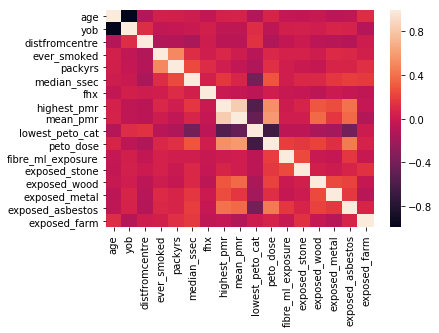

In [7]:
# correlation coefficients for select variables with visual aid for controls only
corr = df[df['case'] == 0][['age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'median_ssec', 'fhx', 'highest_pmr', 'mean_pmr', 'lowest_peto_cat', 'peto_dose', 
           'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [8]:
# cases are, on average, further from the centre as a result of selection
# for all participants being closer to the centre is associated with being older, smoking,
# having a lower median social class and being exposed to asbestos, wood, metal, and stone dust but not farming
# living closer to a centre associated with more fibre ml years asbestos for controls but not cases

In [9]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1,n2 = len(group1), len(group2)
    
    pooled_var = (n1* var1 + n2 * var2) / (n1+n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [10]:
# cohen's d effect size
for col in df[['age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'fhx', 'highest_pmr', 'mean_pmr', 'lowest_peto_cat', 'peto_dose', 
           'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm', 'ever_drug_exposed']].columns:
    print(col)
    print(CohenEffectSize(df[df['case'] == 1][col], df[df['case'] == 0][col]))
    print('\n')


age
0.23120094801825342


yob
-0.23259786449393535


distfromcentre
0.5274589394784849


ever_smoked
0.15547234598099902


packyrs
0.14159751005474872


fhx
0.21095976256979038


highest_pmr
0.10588508799603952


mean_pmr
0.03822849673785413


lowest_peto_cat
-0.04814408904320554


peto_dose
-0.030498502409104716


fibre_ml_exposure
0.051069610991433735


exposed_stone
0.14585211988997185


exposed_wood
0.06669990261473165


exposed_metal
0.14073849990919068


exposed_asbestos
-0.01477674588317375


exposed_farm
0.08831685686264612


ever_drug_exposed
-0.33375970590953075




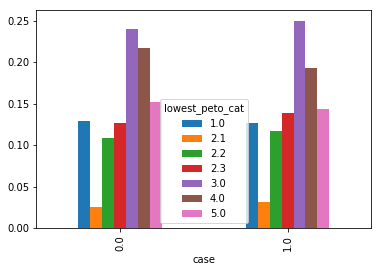

In [11]:
pd.crosstab(df['case'], df['lowest_peto_cat'], rownames=['case'], normalize='index').plot(kind='bar')

In [12]:
import math
df.loc[df['fibre_ml_exposure'] > 0, 'log_fibre_ml_exposure'] = df[df['fibre_ml_exposure'] > 0]['fibre_ml_exposure'].map(lambda x: math.log(x))
df.loc[df['peto_dose'] > 0, 'log_peto_dose'] = df[df['peto_dose'] > 0]['peto_dose'].map(lambda x: math.log(x))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f650449d1d0>,
      dtype=object)

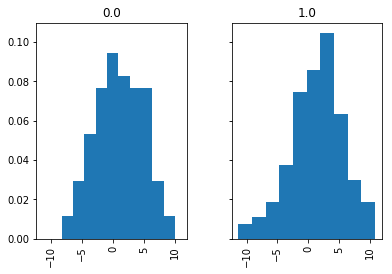

In [13]:
# density = True makes it be a probability mass function, sum of probabilities = 1
# by default hist makes 10 bins
df.hist(column='log_fibre_ml_exposure', by='case', sharex=True, sharey=True, density=True) # fibre_ml years approx log normal?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f65042a09b0>,
      dtype=object)

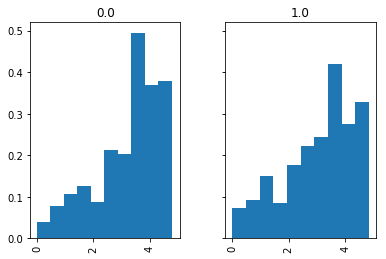

In [14]:
df.hist(column='log_peto_dose', by='case', sharex=True, sharey=True, density=True) # fibre_ml years approx log normal?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f65042708d0>,
      dtype=object)

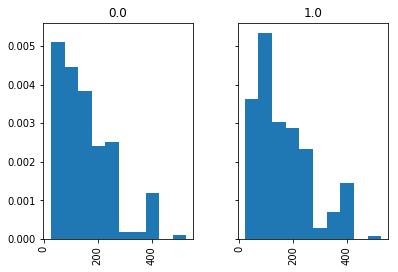

In [15]:
df.hist(column='highest_pmr', by='case', sharex=True, sharey=True, density=True) # fibre_ml years approx log normal?

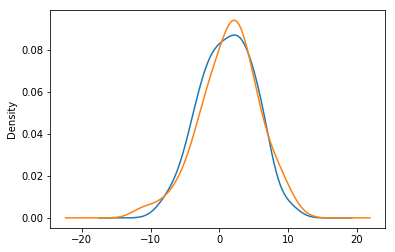

In [16]:
df[df['case'] == 0].log_fibre_ml_exposure.plot.kde()
df[df['case'] == 1].log_fibre_ml_exposure.plot.kde()

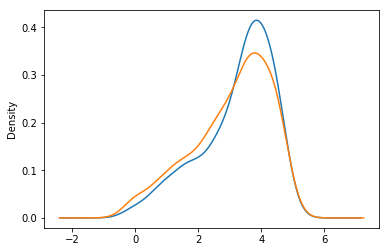

In [17]:
df[df['case'] == 0].log_peto_dose.plot.kde()
df[df['case'] == 1].log_peto_dose.plot.kde()

In [18]:
df.describe().to_csv('descriptive_stats.csv')

In [19]:
df[df.packyrs < 0] # to be fixed

,ipfjes_id,case,dob,age,agegroup,ethnicity,ever_smoked,current_smoker,packyrs,participant_id,...,Other ethnic group,White,definite UIP,no CT,other,possible UIP,yob,ever_drug_exposed,log_fibre_ml_exposure,log_peto_dose
728,721,1.0,1932-01-25,87,85 to 90,White,1,0,-19,210002,...,0,1,1,0,0,0,1932,0,NaN,1.609438


In [20]:
def centile_plot(df, col):
    a=list(range(1,101))
    b = [scoreatpercentile(df[col],i) for i in a]
    cent = pd.DataFrame({'percentile': a, 'value': b}, columns=['percentile', 'value'])
    cent.plot(title=col)

/home/drcjar/anaconda3/envs/ipfjes/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


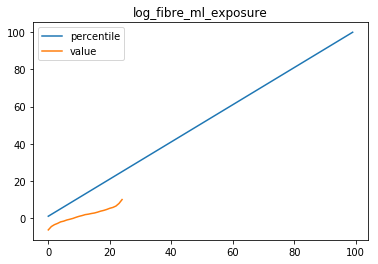

In [21]:
centile_plot(df, 'log_fibre_ml_exposure')

/home/drcjar/anaconda3/envs/ipfjes/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


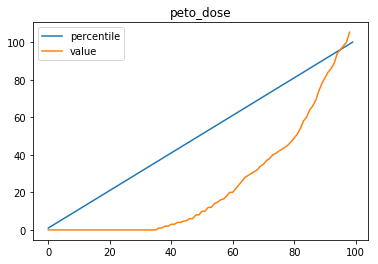

In [22]:
centile_plot(df, 'peto_dose')

In [23]:
df.peto_dose.describe()

count    837.000000
mean      24.002389
std       30.628426
min        0.000000
25%        0.000000
50%        8.000000
75%       40.000000
max      126.000000
Name: peto_dose, dtype: float64

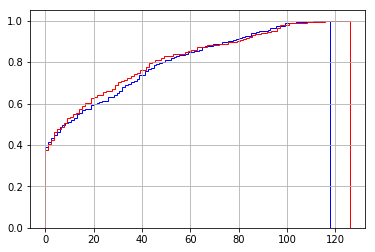

In [24]:
# cumulative distribution function
df[df['case'] == 0].peto_dose.hist(density=True, cumulative=True, histtype=u'step', color= 'b', bins=100)
df[df['case'] == 1].peto_dose.hist(density=True, cumulative=True, histtype=u'step', color= 'r', bins=100)

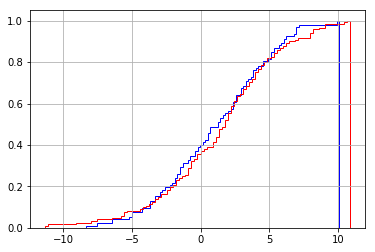

In [25]:
df[df['case'] == 0].log_fibre_ml_exposure.hist(density=True, cumulative=True, histtype=u'step', color= 'b', bins=100)
df[df['case'] == 1].log_fibre_ml_exposure.hist(density=True, cumulative=True, histtype=u'step', color= 'r', bins=100)

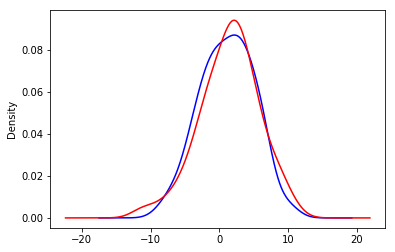

In [26]:
# probability density function estimated using kernel density estimation
df[df['case'] == 0].log_fibre_ml_exposure.plot.kde(color='b')
df[df['case'] == 1].log_fibre_ml_exposure.plot.kde(color='r')

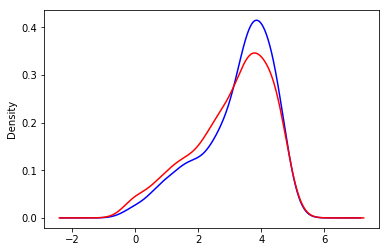

In [27]:
# probability density function estimated using kernel density estimation
df[df['case'] == 0].log_peto_dose.plot.kde(color='b')
df[df['case'] == 1].log_peto_dose.plot.kde(color='r')

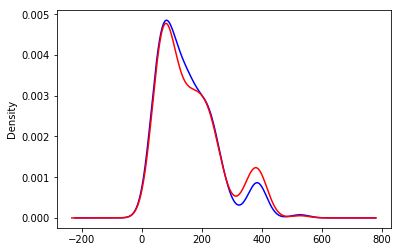

In [28]:
df[df['case'] == 0].highest_pmr.plot.kde(color='b')
df[df['case'] == 1].highest_pmr.plot.kde(color='r')

In [29]:
def make_n_of_cases_and_controls_the_same(df, n):
    """
    makes a random balanced sample
    """
    a = df[df['case'] == 1].drop_duplicates(subset='participant_id').sample(n=n, random_state=1).participant_id.values
    a = df[df.participant_id.isin(a)]
    b = df[df['case'] == 0].drop_duplicates(subset='participant_id').sample(n=n, random_state=1).participant_id.values
    b = df[df.participant_id.isin(b)]
    c = pd.concat([a,b])
    return c

In [30]:
df1 = make_n_of_cases_and_controls_the_same(df,340)

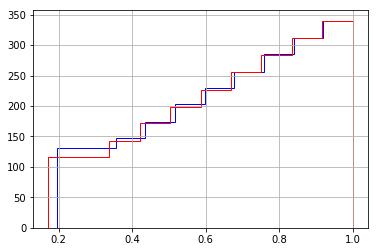

In [31]:
df1[df1['case'] == 0].peto_dose.rank(pct=True).hist(cumulative=True, histtype=u'step', color= 'b')
df1[df1['case'] == 1].peto_dose.rank(pct=True).hist(cumulative=True, histtype=u'step', color= 'r')

In [32]:
df[df['case'] == 0].peto_dose.describe()

count    349.000000
mean      24.547278
std       30.510714
min        0.000000
25%        0.000000
50%        9.000000
75%       42.000000
max      118.000000
Name: peto_dose, dtype: float64

In [33]:
df[df['case'] == 1].peto_dose.describe()

count    488.000000
mean      23.612705
std       30.737673
min        0.000000
25%        0.000000
50%        8.000000
75%       40.000000
max      126.000000
Name: peto_dose, dtype: float64

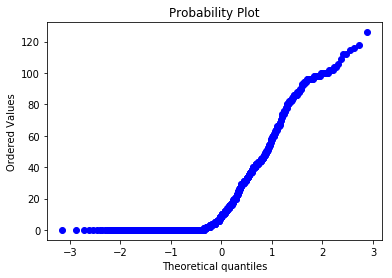

In [34]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.peto_dose
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

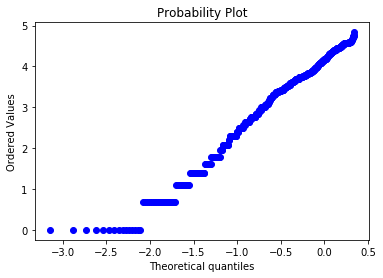

In [35]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.log_peto_dose
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

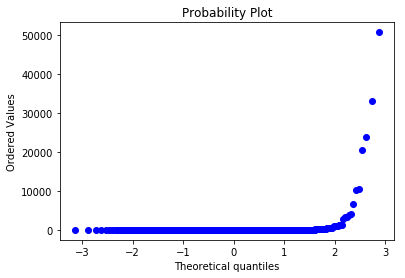

In [36]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.fibre_ml_exposure
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

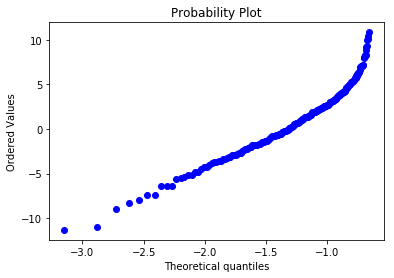

In [37]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.log_fibre_ml_exposure
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [38]:
# peto_dose and fibre_ml_exposure are roughly log normal distributed

In [39]:
df.fibre_ml_exposure.skew()

15.673771809429475